## Yatsa Data Analytics

Yatsa is company that helps you track and manage your assets better. 
This notebook is a quick look at the data that Yatsa collects from their user's assets and the trips the assets being tracked have made. The goal of the analytics is to provide insights from the data and answer the following business questions:
- What is the average distance travelled by vehicles in a day, week or month?
- What are the most common destination for vehicles and how frequent do they travel to  these destinations?

### Extra
- Any trends in driver behaviour for example speeding?
- Any pattern or trends in the types of trips made by vehicles for example: do smaller vehicles travel through smaller distances.

`trips.json` file is too large to be uploaded to github. It can be download from [here](https://drive.google.com/drive/folders/1cVddbKWqv8B9NF6B0ALS3Rv4vZAxEi1Z?usp=share_link)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
assets = pd.read_json('Data/assets.json')

In [ ]:
assets.head()

,id,make,model,year
0,QRmYjfT,TOYOTA Ractis 1.0,Ractis 1.0,2006.0
1,DpXMzg3,Lexus CT 200h,CT 200h,NaN
2,4tQe9sV,Honda Odyssey,Odyssey,NaN
3,x2LJWsl,MITSUBISHI Lancer Cedia LA-CS2A,Lancer Cedia LA-CS2A,2005.0
4,eH0O4bf,Nissan,Note,2011.0


In [ ]:
import json

In [ ]:
with open('Data/trips.json') as f:
    trips = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/trips.json'

In [ ]:
print(trips[0])

NameError: name 'trips' is not defined

In [ ]:
columns = []
columns.append('id')
columns.append('created')
columns.append('asset_id')
columns.append('distance')
data_origin = trips[3]['origin']
data_destination = trips[4]['destination']
data_points = trips[6]['points'][0]
for key in data_origin.keys():
    if key not in columns:
        columns.append('origin_' + key)
for key in data_destination.keys():
    if key not in columns:
        columns.append('destination_' + key)
for k, v in data_points.items():
    if k not in columns:
        if k == 'location':
            for key in v.keys():
                if key not in columns:
                    columns.append('point_' + key)
        else:
            columns.append('point_' + k)
print(columns)


['id', 'created', 'asset_id', 'distance', 'origin_latitude', 'origin_longitude', 'origin_time_stamp', 'origin_address', 'origin_odometer', 'destination_latitude', 'destination_longitude', 'destination_time_stamp', 'destination_address', 'destination_odometer', 'point_bearing', 'point_latitude', 'point_longitude', 'point_original_index', 'point_place_id']


In [ ]:
trips_df = pd.DataFrame(columns=columns)
# fill the dataframe columns with trips data 

In [ ]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,origin_odometer,destination_latitude,destination_longitude,destination_time_stamp,destination_address,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
0,35Ldjpf,2022-03-14T17:31:51.003+00:00,0ROajub,4321.65,-1.04322,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",None,-1.041213,37.092602,2022-03-14T17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",None,0.0,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4
1,agWTdy5,2023-03-07T08:53:55.607+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",None,-1.430601,36.687973,2023-03-07T10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4
2,mcXsPmo,2023-03-07T06:40:53.771+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,-1.305638,36.824879,2023-03-07T08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",None,0.0,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ
3,WRBY3Lt,2023-03-07T05:12:29.007+00:00,0gMAW5w,24609.34,-1.30549,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",None,-1.429965,36.688194,2023-03-07T06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ
4,1WaNBeb,2023-03-07T03:15:18.67+00:00,0gMAW5w,28395.71,-1.397144,36.75983,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",None,-1.305595,36.825199,2023-03-07T04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",None,0.0,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo


`Load` data into a Pandas dataframe from the CSV file in the `Data` folder. Do not run the two code cells below as it will take much time to execute.

In [ ]:
for i, trip in enumerate(trips):
    trips_df.loc[i, 'id'] = trip['id']
    trips_df.loc[i, 'created'] = trip['created']
    trips_df.loc[i, 'asset_id'] = trip['asset_id']
    trips_df.loc[i, 'distance'] = trip['distance']
    for key, value in trip['origin'].items():
        trips_df.loc[i, 'origin_' + key] = value
    for key, value in trip['destination'].items():
        trips_df.loc[i, 'destination_' + key] = value
    for i, v in enumerate(trip['points']):
        for key, value in v.items():
            if key == 'location':
                for k, v in value.items():
                    trips_df.loc[i, 'point_' + k] = v
            else:
                trips_df.loc[i, 'point_' + key] = value

In [ ]:
# save the trips_df to csv file
trips_df.to_csv('Data/trips_df.csv', index=False)

# Execute the code cells below to start working with trips data.

In [ ]:
trips_df = pd.read_csv('Data/trips_df.csv')

In [ ]:
trips_df.shape

(6703, 19)

In [ ]:
trips_df.describe()

,distance,origin_latitude,origin_longitude,origin_odometer,destination_latitude,destination_longitude,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index
count,4804.000000,4804.000000,4804.000000,0.0,4804.000000,4804.000000,0.0,6703.000000,6703.000000,6703.000000,6703.000000
mean,11241.547325,-1.033155,36.911776,NaN,-1.033224,36.911758,NaN,-15.064304,-0.404014,36.305245,6.828883
std,20407.447419,0.433675,0.411567,NaN,0.435225,0.411621,NaN,74.698946,0.846147,0.891082,20.025799
min,101.510000,-3.229457,34.215324,NaN,-3.328162,34.217648,NaN,-180.000000,-1.295174,34.998313,0.000000
25%,1634.500000,-1.248051,36.824792,NaN,-1.249770,36.824720,NaN,-53.565599,-1.040912,35.256035,0.000000
50%,4962.310000,-1.126192,36.995655,NaN,-1.126177,36.993961,NaN,0.000000,-1.036796,37.051986,0.000000
75%,11809.925000,-1.051952,37.092146,NaN,-1.051691,37.092073,NaN,0.000000,0.521471,37.072456,0.000000
max,342478.600000,1.256370,40.124302,NaN,1.256327,40.126652,NaN,180.000000,1.024317,37.094406,99.000000


In [ ]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,origin_odometer,destination_latitude,destination_longitude,destination_time_stamp,destination_address,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
0,35Ldjpf,2022-03-14T17:31:51.003+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14T17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",NaN,-1.041213,37.092602,2022-03-14T17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",NaN,0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4
1,agWTdy5,2023-03-07T08:53:55.607+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07T08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",NaN,-1.430601,36.687973,2023-03-07T10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",NaN,-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4
2,mcXsPmo,2023-03-07T06:40:53.771+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07T06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",NaN,-1.305638,36.824879,2023-03-07T08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",NaN,0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ
3,WRBY3Lt,2023-03-07T05:12:29.007+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07T05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",NaN,-1.429965,36.688194,2023-03-07T06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",NaN,-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ
4,1WaNBeb,2023-03-07T03:15:18.67+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07T03:15:15+00:00,"Soronik Road, Nairobi, Kenya",NaN,-1.305595,36.825199,2023-03-07T04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",NaN,0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo


In [ ]:
trips_df.tail()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,origin_odometer,destination_latitude,destination_longitude,destination_time_stamp,destination_address,destination_odometer,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
6698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.326052,-1.289222,36.791666,0,ChIJs_apPKUQLxgRFj_nEgRciEw
6699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.738238,-1.289234,36.791669,41,ChIJs_apPKUQLxgRFj_nEgRciEw
6700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.738238,-1.289438,36.791713,0,ChIJs_apPKUQLxgRFj_nEgRciEw
6701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-144.286924,-1.289483,36.791681,0,ChIJs_apPKUQLxgRFj_nEgRciEw
6702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-93.347666,-1.289484,36.791662,42,ChIJs_apPKUQLxgRFj_nEgRciEw


In [ ]:
trips_df.dtypes

id                         object
created                    object
asset_id                   object
distance                  float64
origin_latitude           float64
origin_longitude          float64
origin_time_stamp          object
origin_address             object
origin_odometer           float64
destination_latitude      float64
destination_longitude     float64
destination_time_stamp     object
destination_address        object
destination_odometer      float64
point_bearing             float64
point_latitude            float64
point_longitude           float64
point_original_index        int64
point_place_id             object
dtype: object

In [ ]:
trips_df.columns

Index(['id', 'created', 'asset_id', 'distance', 'origin_latitude',
       'origin_longitude', 'origin_time_stamp', 'origin_address',
       'origin_odometer', 'destination_latitude', 'destination_longitude',
       'destination_time_stamp', 'destination_address', 'destination_odometer',
       'point_bearing', 'point_latitude', 'point_longitude',
       'point_original_index', 'point_place_id'],
      dtype='object')

In [ ]:
trips_df.isna().sum()

id                        1899
created                   1899
asset_id                  1899
distance                  1899
origin_latitude           1899
origin_longitude          1899
origin_time_stamp         1899
origin_address            1900
origin_odometer           6703
destination_latitude      1899
destination_longitude     1899
destination_time_stamp    1899
destination_address       1900
destination_odometer      6703
point_bearing                0
point_latitude               0
point_longitude              0
point_original_index         0
point_place_id               0
dtype: int64

In [ ]:
trips_df.nunique()

id                        4804
created                   4804
asset_id                    34
distance                  4800
origin_latitude           4571
origin_longitude          4168
origin_time_stamp         4803
origin_address            1136
origin_odometer              0
destination_latitude      4517
destination_longitude     3972
destination_time_stamp    4803
destination_address       1021
destination_odometer         0
point_bearing             4087
point_latitude            3636
point_longitude           3639
point_original_index       100
point_place_id            1417
dtype: int64

In [ ]:
# drop the columns whose entire column is null
trips_df.dropna(axis=1, how='all',inplace=True)
#limit the df to only the first 404 rows
trips_df = trips_df.iloc[:4804, :]

In [ ]:
trips_df.describe()

,distance,origin_latitude,origin_longitude,destination_latitude,destination_longitude,point_bearing,point_latitude,point_longitude,point_original_index
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000
mean,11241.547325,-1.033155,36.911776,-1.033224,36.911758,-14.537114,-0.606175,36.551507,6.269567
std,20407.447419,0.433675,0.411567,0.435225,0.411621,79.101301,0.670575,0.801935,19.300811
min,101.510000,-3.229457,34.215324,-3.328162,34.217648,-179.798972,-1.049888,35.196382,0.000000
25%,1634.500000,-1.248051,36.824792,-1.249770,36.824720,-64.649903,-1.040346,35.436866,0.000000
50%,4962.310000,-1.126192,36.995655,-1.126177,36.993961,0.000000,-1.037347,37.068690,0.000000
75%,11809.925000,-1.051952,37.092146,-1.051691,37.092073,7.810997,0.211168,37.074455,0.000000
max,342478.600000,1.256370,40.124302,1.256327,40.126652,180.000000,0.609576,37.094406,99.000000


In [ ]:
trips_df.isnull().sum()

id                        0
created                   0
asset_id                  0
distance                  0
origin_latitude           0
origin_longitude          0
origin_time_stamp         0
origin_address            1
destination_latitude      0
destination_longitude     0
destination_time_stamp    0
destination_address       1
point_bearing             0
point_latitude            0
point_longitude           0
point_original_index      0
point_place_id            0
dtype: int64

In [ ]:
#The resulting df contains only the rows where at least one of the values in these columns is null.
trips_df[trips_df['origin_address'].isnull() | trips_df['destination_address'].isnull()]

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
922,v0Wgz5c,2022-11-06T01:11:56.532+00:00,QRmYjfT,862.05,-1.18568,36.744983,2022-11-06T01:11:50+00:00,NaN,-1.185388,36.748775,2022-11-06T01:16:28+00:00,NaN,0.0,-1.035254,37.075637,0,ChIJI7NjvYVOLxgRfpELFek-IkY


In [ ]:
trips_df.dropna(subset=['origin_address', 'destination_address'], inplace=True)

In [ ]:
trips_df.isnull().sum()

id                        0
created                   0
asset_id                  0
distance                  0
origin_latitude           0
origin_longitude          0
origin_time_stamp         0
origin_address            0
destination_latitude      0
destination_longitude     0
destination_time_stamp    0
destination_address       0
point_bearing             0
point_latitude            0
point_longitude           0
point_original_index      0
point_place_id            0
dtype: int64

## Util
1. This function converts the timestamps in the dataframe to a standard format.
- The columns with timestamps include:
   - created
   - destination_timestamp
   - origin_timestamp
- Creating a copy of the original dataframe before modifying it avoids accidentally modifying the original data.   
- The function returns a new dataframe with the changed formats
   

In [ ]:
def convert_time(columns:list[str]):
    trips_df_copy1 = trips_df.copy()
    for column in columns:
        trips_df_copy1[column] = pd.to_datetime(trips_df_copy1[column])
    return trips_df_copy1    

In [ ]:
trips_df = convert_time(columns=['created', 'origin_time_stamp','destination_time_stamp' ])

In [ ]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14 17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07 10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07 08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07 06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07 04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo


### Creating a new column called duration in hours

In [ ]:
trips_df['duration'] = (pd.to_datetime(trips_df['destination_time_stamp']) - pd.to_datetime(trips_df['origin_time_stamp'])).dt.seconds / 3600

In [ ]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id,duration
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14 17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4,0.372222
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07 10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4,1.332222
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07 08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.737778
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07 06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.290833
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07 04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo,1.737778


In [ ]:
trips_df['created_day'] = trips_df['created'].dt.day_name()
trips_df['created_week'] = trips_df['created'].dt.isocalendar().week
trips_df['created_month'] = trips_df['created'].dt.month_name()


In [ ]:
pd.set_option('display.max_columns', None)  # show all columns
trips_df['distance_km'] = trips_df['distance'] / 1000
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id,duration,created_day,created_week,created_month,distance_km
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14 17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4,0.372222,Monday,11,March,4.32165
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07 10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4,1.332222,Tuesday,10,March,24.70324
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07 08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.737778,Tuesday,10,March,30.68927
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07 06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.290833,Tuesday,10,March,24.60934
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07 04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo,1.737778,Tuesday,10,March,28.39571


### Creating Average speed column (km/h)

In [ ]:
trips_df['average_speed'] = trips_df['distance_km'] / trips_df['duration']

In [ ]:
trips_df.head()

,id,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id,duration,created_day,created_week,created_month,distance_km,average_speed
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14 17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4,0.372222,Monday,11,March,4.32165,11.610403
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07 10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4,1.332222,Tuesday,10,March,24.70324,18.542882
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07 08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.737778,Tuesday,10,March,30.68927,17.660066
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07 06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.290833,Tuesday,10,March,24.60934,19.064692
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07 04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo,1.737778,Tuesday,10,March,28.39571,16.340242


In [ ]:
trips_df.describe()

,distance,origin_latitude,origin_longitude,destination_latitude,destination_longitude,point_bearing,point_latitude,point_longitude,point_original_index,duration,created_week,distance_km,average_speed
count,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000,4803.000000
mean,11243.708370,-1.033124,36.911811,-1.033193,36.911792,-14.540141,-0.606086,36.551398,6.270872,0.563549,20.720591,11.243708,23.428399
std,20409.022451,0.433715,0.411602,0.435265,0.411657,79.109259,0.670617,0.801983,19.302609,0.739524,17.145730,20.409022,393.695878
min,101.510000,-3.229457,34.215324,-3.328162,34.217648,-179.798972,-1.049888,35.196382,0.000000,0.002222,1.000000,0.101510,0.310191
25%,1635.575000,-1.248115,36.824804,-1.249776,36.824744,-64.698351,-1.040347,35.436864,0.000000,0.157917,7.000000,1.635575,9.354446
50%,4963.710000,-1.126187,36.995731,-1.126174,36.994041,0.000000,-1.037347,37.068687,0.000000,0.347500,9.000000,4.963710,15.298000
75%,11810.790000,-1.051946,37.092152,-1.051689,37.092079,7.810997,0.211171,37.074451,0.000000,0.651528,40.000000,11.810790,22.034570
max,342478.600000,1.256370,40.124302,1.256327,40.126652,180.000000,0.609576,37.094406,99.000000,8.738889,52.000000,342.478600,27248.472000


In [ ]:
dayT = trips_df.groupby(trips_df['created'].dt.day)['id'].count().sort_values(ascending=False)
print(dayT)

created
28    211
1     210
4     209
27    203
6     203
2     201
25    192
3     189
23    180
26    179
5     178
24    171
11    168
21    156
17    155
7     152
22    151
9     139
10    137
20    137
12    132
18    132
30    129
15    128
14    127
13    122
16    119
19    118
29    101
8     101
31     73
Name: id, dtype: int64


# Vizualizations

## Util 2
- A function to draw the bar graphs
- the figsize is by default (8,6)
- the feature are the columns in the trips_df
- label is the string of the feature ,e.g Day 

In [ ]:
def draw_bar(feature: any, label:str,bins_range:range, figsize = (8,6),):
    avg_distance = trips_df.groupby(feature)['distance_km'].mean()
    
    fig1, ax1 = plt.subplots(figsize=figsize)
    ax1.bar(avg_distance.index, avg_distance.values)
    ax1.set_xlabel(label)
    ax1.set_xticks(bins_range)#scale
    ax1.set_ylabel('Average Distance Travelled (km)')
    ax1.set_title('Average Distance Travelled by Vehicles in a {}'.format(label))
    plt.show()

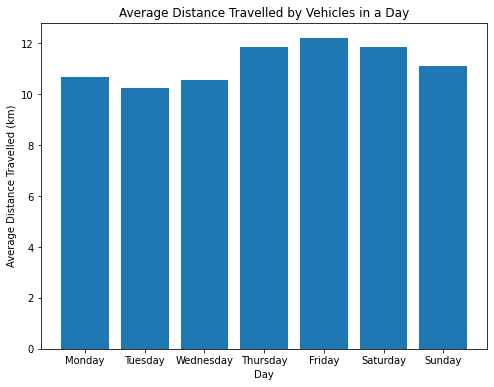

In [ ]:
days_in_week = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
trips_df['created_day'] = pd.Categorical(trips_df['created_day'], ordered=True, categories=days_in_week)
draw_bar(feature='created_day', label='Day',bins_range=range(0,7,1))


### NOTES
- Vehicles travel farthest on Friday, Saturday and Sunday
- Vehicles travel least on Monday

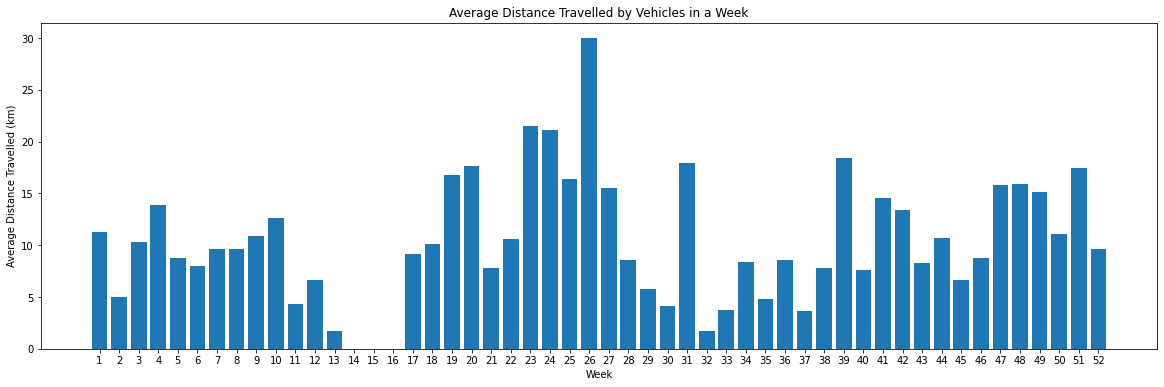

In [ ]:
draw_bar(feature='created_week', label='Week', bins_range= range(1,53,1), figsize=(20,6))

### NOTES
- Vehicles travel the most on the 26th week of the year

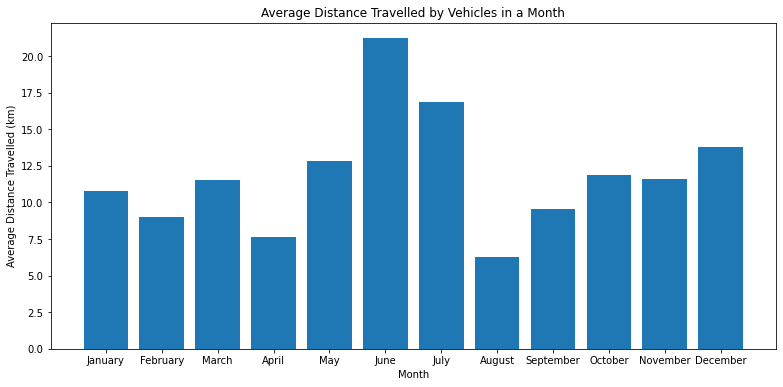

In [ ]:

# convert month column to categorical data with a specific order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trips_df['created_month'] = pd.Categorical(trips_df['created_month'], categories=month_order, ordered=True)
draw_bar(feature='created_month', label='Month', figsize=(13,6), bins_range=range(0,12,1))

### NOTES
- Vehicles travel more mid-year in the months of May, June, July.
- Vehicles travel least in November, then suddenly travel more in december .
- The distance is gradually increasing from February then peaks at July.
- After this it drops.

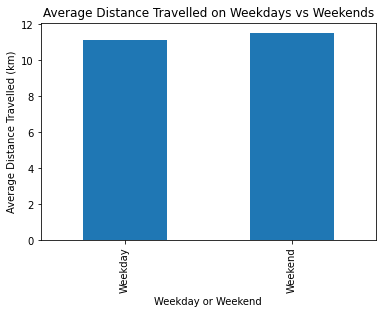

In [ ]:
# Create a new column to identify whether a trip was on a weekday or weekend
trips_df['is_weekend'] = trips_df['created_day'].isin(['Saturday', 'Sunday'])

# Group the trips by weekday/weekend and calculate the average distance travelled
avg_distance_by_day = trips_df.groupby('is_weekend')['distance_km'].mean()

# Visualize the results
avg_distance_by_day.plot(kind='bar', title='Average Distance Travelled on Weekdays vs Weekends')
plt.xlabel('Weekday or Weekend')
plt.ylabel('Average Distance Travelled (km)')
plt.xticks((0, 1), ['Weekday', 'Weekend'])
plt.show()

### NOTES
- Vehicles travel more distances during the weekends than weekdays

## 2. What are the most common destinations for vehicles?

                                   destination_address  num_trips  frequency
953                        Thika, Kiambu County, Kenya        466   0.097023
875                        Ruiru, Kiambu County, Kenya        181   0.037685
527        Kiandutu Slums, Thika, Kiambu County, Kenya        175   0.036436
217                    A3, Thika, Kiambu County, Kenya        158   0.032896
921                        Super Highway, Ruiru, Kenya        123   0.025609
528                  Kianyaga, Kirinyaga County, Kenya        116   0.024152
317       Eastern By Pass, Ruiru, Kiambu County, Kenya        109   0.022694
651             Makongeni, Thika, Kiambu County, Kenya        106   0.022070
540  Kiganjo - British American Tobacco Road, Thika...         88   0.018322
686           Mitero Road, Ndathi, Nyeri County, Kenya         78   0.016240


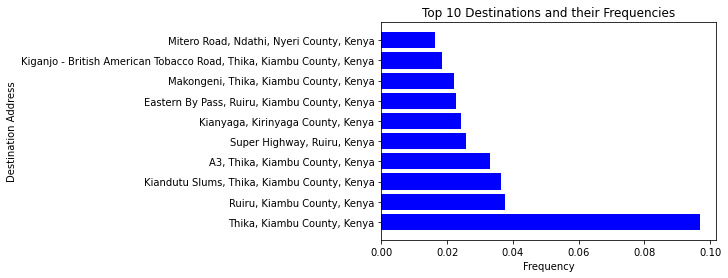

In [ ]:
# Group trips by destination address
# group together all the trips that have 
#the same ending point. Then, count how many trips there are in each group using the size() function.
destination_counts = trips_df.groupby('destination_address').size().reset_index(name='num_trips')


#sort destination by number of trips
sorted_destinations = destination_counts.sort_values(by='num_trips', ascending= False)

#calculate average frequency of trips to each destination e.g 466/4804
sorted_destinations['frequency'] = sorted_destinations['num_trips'] / trips_df['created'].nunique()

print(sorted_destinations.head(10))

# Create a horizontal bar chart(y,x)
plt.barh(sorted_destinations['destination_address'].head(10), sorted_destinations['frequency'].head(10), color='blue')

# Add labels and title
plt.xlabel('Frequency')
plt.ylabel('Destination Address')
plt.title('Top 10 Destinations and their Frequencies')

# Show the plot
plt.show()

### Group by day of week

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10708\1809367058.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_destinations.drop('total', axis=1, inplace=True)


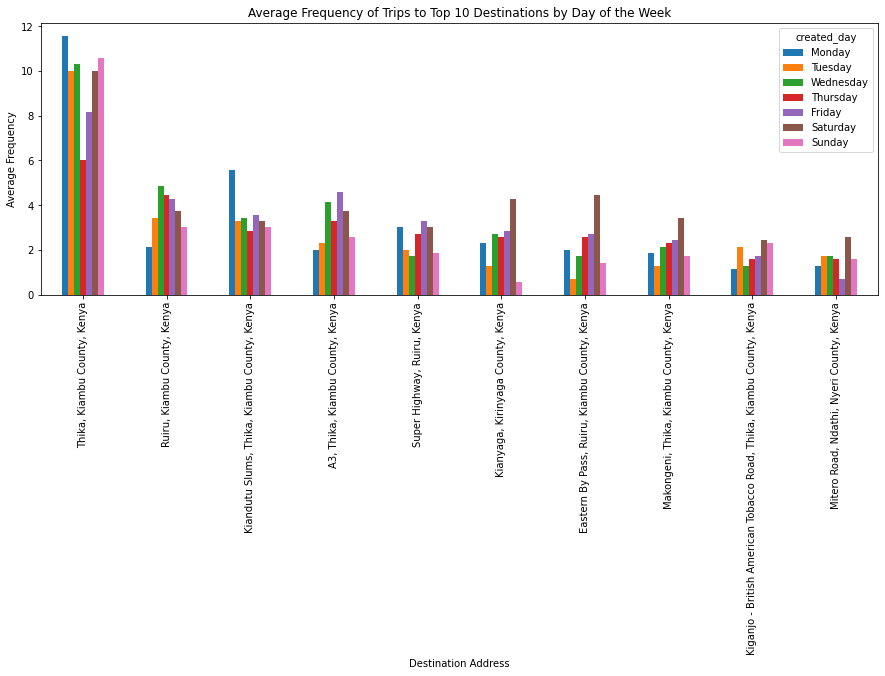

In [ ]:
# group trips by destination and day of the week
destination_day_counts = trips_df.groupby(['destination_address', 'created_day']).size().reset_index(name='num_trips')

# calculate average frequency of trips to each destination on each day of the week
destination_day_counts['frequency'] = destination_day_counts['num_trips'] / trips_df['created_day'].nunique()

# pivot the table to have days of the week as columns
destination_day_pivot = destination_day_counts.pivot(index='destination_address', columns='created_day', values='frequency')

# sort destinations by total frequency of trips
destination_day_pivot['total'] = destination_day_pivot.sum(axis=1)
sorted_destinations = destination_day_pivot.sort_values(by='total', ascending=False)

# plot the top 10 destinations by frequency on each day of the week
top_destinations = sorted_destinations.head(10)
# create a new dataframe with the modified columns
top_destinations.drop('total', axis=1, inplace=True)
top_destinations.plot(kind='bar', figsize=(15, 5))
plt.title('Average Frequency of Trips to Top 10 Destinations by Day of the Week')
plt.xlabel('Destination Address')
plt.ylabel('Average Frequency')
plt.show()

## 3. Are there any patterns or trends in driver behavior, such as speeding, that could be addressed through training or coaching?

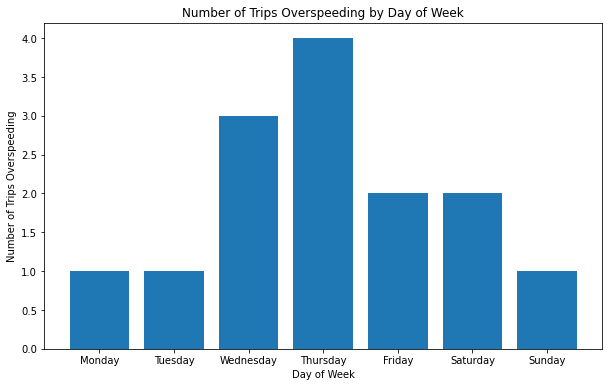

In [ ]:
speed_limit_kmph = 80
trips_df['over_speed_limit'] = trips_df['average_speed'] > speed_limit_kmph


# Group the trips by day of week and count the number of trips where the driver exceeded the speed limit
speeding_counts = trips_df.groupby(trips_df['created_day'])['over_speed_limit'].sum()

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(speeding_counts.index, speeding_counts.values)

# Set axis labels and title
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Trips Overspeeding')
ax.set_title('Number of Trips Overspeeding by Day of Week')

# Show the plot
plt.show()

- Drivers over speed on Thursdays

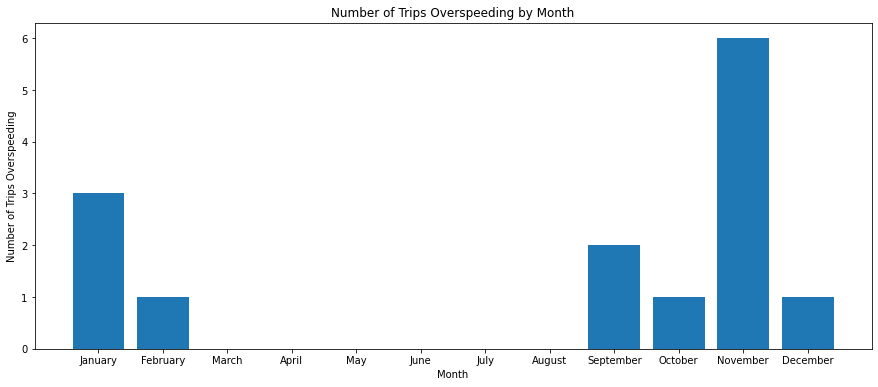

In [ ]:
# Group the trips by day of week and count the number of trips where the driver exceeded the speed limit
speeding_counts = trips_df.groupby(trips_df['created_month'])['over_speed_limit'].sum()

# Create a bar chart
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(speeding_counts.index, speeding_counts.values)

# Set axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Number of Trips Overspeeding')
ax.set_title('Number of Trips Overspeeding by Month')

# Show the plot
plt.show()

-Drivers overspeed most on November

Text(0.5, 1.0, 'Distribution of Speeds')

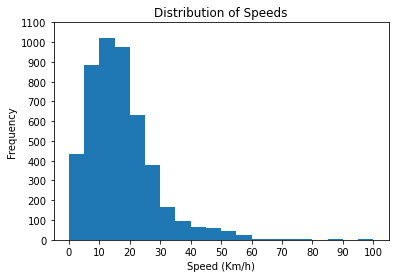

In [ ]:
# compare to speed limit
speed_limit_kmph = 80
trips_df['over_speed_limit'] = trips_df['average_speed'] > speed_limit_kmph


# create histogram of speed values
plt.hist(trips_df['average_speed'], bins=range(0,101,5))

# set x-axis label
plt.xlabel('Speed (Km/h)')
plt.xticks(range(0,102,10))
plt.yticks(range(0,1200,100))

# set y-axis label
plt.ylabel('Frequency')

# set title
plt.title('Distribution of Speeds')

- The average speed is skewed to the right

In [ ]:

trips_df_copy2 = trips_df.drop(trips_df.index[4805:])
speed_limit_counts = trips_df_copy2['over_speed_limit'].value_counts()
print(speed_limit_counts)

False    4789
True       14
Name: over_speed_limit, dtype: int64


## Merge Assets and trips_df

In [ ]:
assets['make_category'] = assets['make'].apply(lambda x: 'small' if x in ['SUZUKI EVERY', 'BAJAJ', 'PIAGGIO', 'tuk tuk', 'TUK TUK', 'Maruti'] else 'medium')

In [ ]:
assets.isnull().sum()

id                0
make              0
model            13
year             15
make_category     0
dtype: int64

In [ ]:
merged_df = pd.merge(trips_df, assets, left_on='asset_id', right_on='id', how='left')

In [ ]:
merged_df.head()

,id_x,created,asset_id,distance,origin_latitude,origin_longitude,origin_time_stamp,origin_address,destination_latitude,destination_longitude,destination_time_stamp,destination_address,point_bearing,point_latitude,point_longitude,point_original_index,point_place_id,duration,created_day,created_week,created_month,distance_km,average_speed,is_weekend,over_speed_limit,id_y,make,model,year,make_category
0,35Ldjpf,2022-03-14 17:31:51.003000+00:00,0ROajub,4321.65,-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",-1.041213,37.092602,2022-03-14 17:54:07+00:00,"Kenyatta Highway, Thika, Kiambu County, Kenya",0.000000,-1.040909,37.071567,0,ChIJuy2HBJJOLxgRflFygNiz0W4,0.372222,Monday,11,March,4.32165,11.610403,False,False,0ROajub,HONDA,None,NaN,medium
1,agWTdy5,2023-03-07 08:53:55.607000+00:00,0gMAW5w,24703.24,-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.430601,36.687973,2023-03-07 10:13:47+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-163.431442,-1.041084,37.071515,0,ChIJuy2HBJJOLxgRflFygNiz0W4,1.332222,Tuesday,10,March,24.70324,18.542882,False,False,0gMAW5w,TOYOTA,Hiace,2003.0,medium
2,mcXsPmo,2023-03-07 06:40:53.771000+00:00,0gMAW5w,30689.27,-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-1.305638,36.824879,2023-03-07 08:25:04+00:00,"Nyayo Stadium, Nairobi, Kenya",0.000000,-1.041084,37.071515,1,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.737778,Tuesday,10,March,30.68927,17.660066,False,False,0gMAW5w,TOYOTA,Hiace,2003.0,medium
3,WRBY3Lt,2023-03-07 05:12:29.007000+00:00,0gMAW5w,24609.34,-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",-1.429965,36.688194,2023-03-07 06:29:53+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",-72.222748,-1.040909,37.070972,0,ChIJjRl4E5JOLxgR5QYZp79nAZQ,1.290833,Tuesday,10,March,24.60934,19.064692,False,False,0gMAW5w,TOYOTA,Hiace,2003.0,medium
4,1WaNBeb,2023-03-07 03:15:18.670000+00:00,0gMAW5w,28395.71,-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",-1.305595,36.825199,2023-03-07 04:59:31+00:00,"Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",0.000000,-1.040909,37.070972,0,ChIJx5QNLpJOLxgRzW-2tUJvBuo,1.737778,Tuesday,10,March,28.39571,16.340242,False,False,0gMAW5w,TOYOTA,Hiace,2003.0,medium


### Util 3
- A function to visualize the features in the merged_df grouped by another feature

In [ ]:
# visualize the average speed of the vehicles over the make category of the vehicles

def draw_merged_graph(feature: str, xlabel: str, feature2:str,ylabel:str):
    plt.figure(figsize=(10, 5))
    merged_df.groupby(feature)[feature2].mean().plot(kind='bar')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('{} of the Vehicles by the {} of the Vehicles'.format(ylabel, xlabel))
    plt.show()

## 4. Are there any patterns or trends in the types of trips made by vehicles? For example, do smaller vehicles make shorter or longer trips?

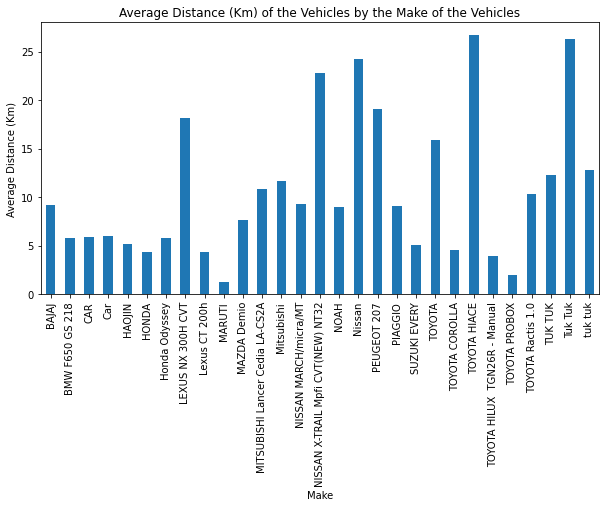

In [ ]:
draw_merged_graph(feature='make', xlabel='Make',feature2='distance_km',ylabel='Average Distance (Km)')

### Notes
- Toyota Hiace, Tuktuk, Nissan travel most Kilometers

In [ ]:
destination_counts = trips_df.groupby('destination_address').size().reset_index(name='num_trips')
merged_df = pd.merge(merged_df, destination_counts, on='destination_address')

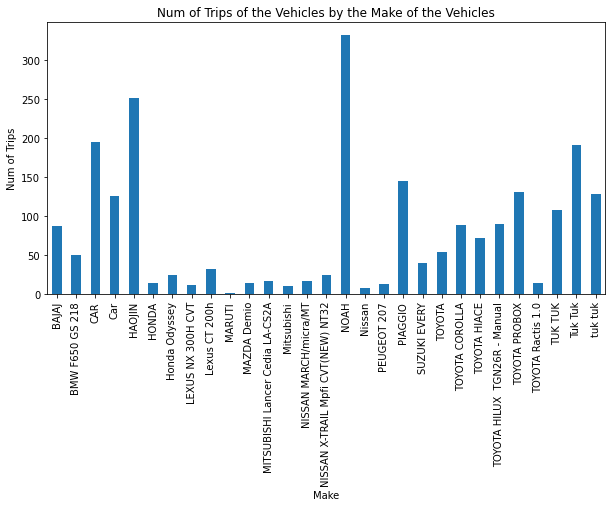

In [ ]:
draw_merged_graph(feature='make',xlabel='Make', feature2='num_trips',ylabel='Num of Trips')

### Notes
- Noah makes the most trips
- Haojin the 2nd most trips.
- Car the 3rd most trips.
- Maruti makes the least trips

### Comparing the above 2 graphs;
- Toyota Hiace travels the longest distance (Km) but does not make that much trips, this could imply that it travels long distances occassionally.
- Another example; Noah makes the most trips but shorter distances, this could imply that it travels short distances frequently.

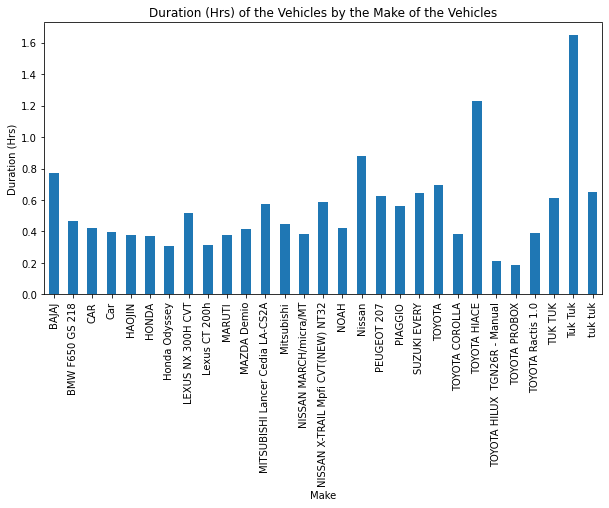

In [ ]:
draw_merged_graph(feature='make',xlabel='Make',feature2='duration',ylabel='Duration (Hrs)')

### Notes
- Tuk tuk take time on the road,maybe its because they cover long distances and generally they are slower in speed than most vehicles.

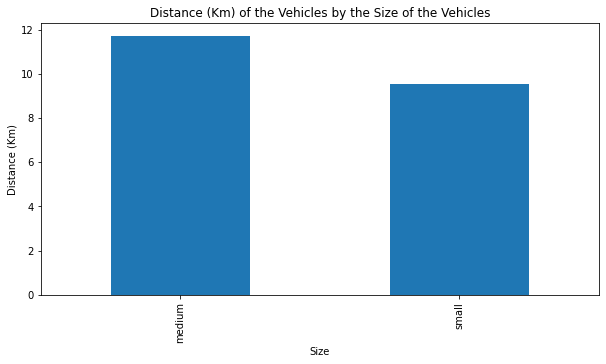

In [ ]:
draw_merged_graph(feature='make_category', xlabel='Size', feature2='distance_km',ylabel='Distance (Km)')

### Notes
- Medium vehicles travel kilometers more than small ones

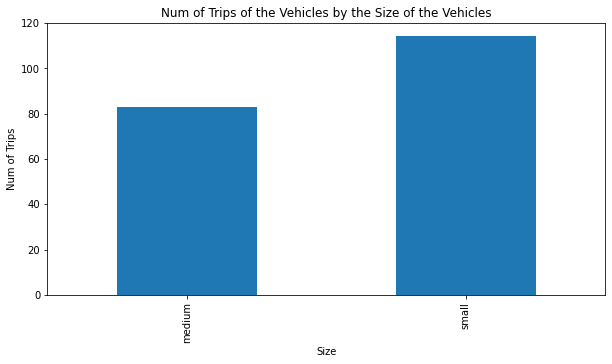

In [ ]:
draw_merged_graph(feature='make_category',xlabel='Size',feature2='num_trips',ylabel='Num of Trips')

### Notes
- Small vehicles make more trips than medium. 

### Comparing the above 2 graphs
- Medium Sized vehicles travel more Kilometers but fewer trips.
- Small sized vehicles travel less kilometers but more trips.

In [ ]:
unique_years = merged_df['created'].dt.year.unique()
print(unique_years)

[2022 2023]


created_month_num  year  
end                2022.0    26.005164
start              2022.0    32.897603
Name: average_speed, dtype: float64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_10708\2331123971.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_filtered['created_month_num'] = merged_df_filtered['created'].dt.month


Text(0.5, 1.0, 'Average Speed of Vehicles at the Start and End of the Year')

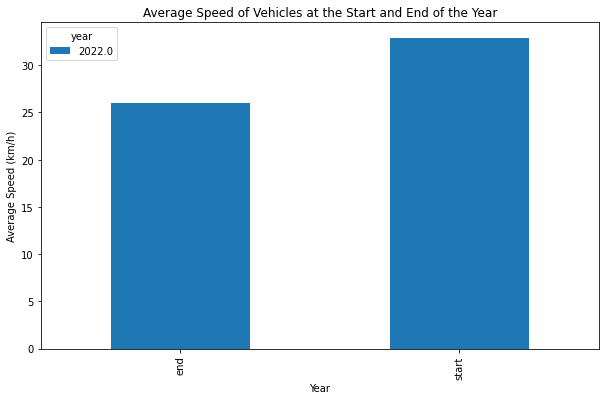

In [ ]:
# Filter the data by years 2022 and 2023
merged_df_filtered = merged_df[(merged_df['year'] == 2022) | (merged_df['year'] == 2023)]

# Group the filtered data by the month of creation and whether it's at the start or end of the year
merged_df_filtered['created_month_num'] = merged_df_filtered['created'].dt.month
start_end_speed = merged_df_filtered.groupby([merged_df_filtered['created_month_num'].apply(lambda x: 'start' if x <= 6 else 'end'), 'year'])['average_speed'].mean()

print(start_end_speed)
# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
start_end_speed.unstack().plot(kind='bar', ax=ax)

# Set chart labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Average Speed (km/h)')
ax.set_title('Average Speed of Vehicles at the Start and End of the Year')

### Vehicles are more speedy at the start of the year

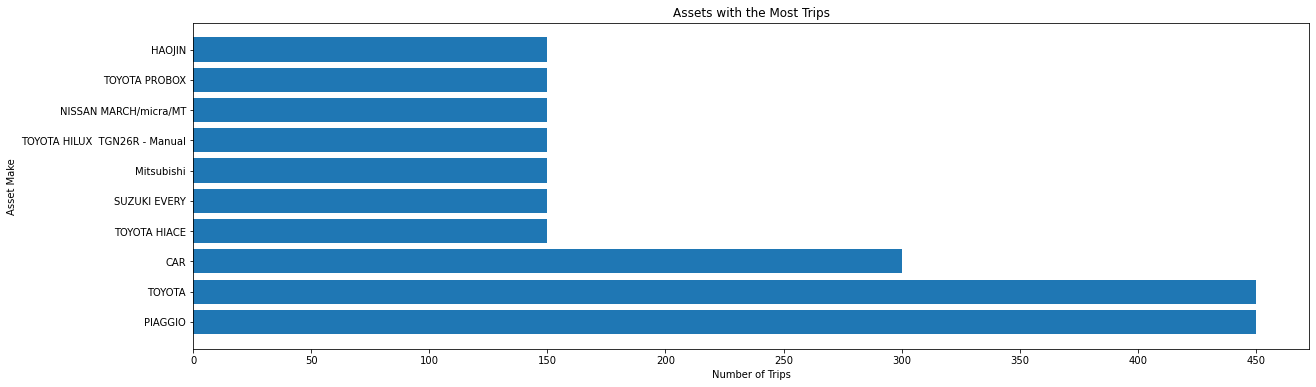

In [ ]:
# Get the top 10 assets with the most trips
top_assets = merged_df['make'].value_counts().head(10)

# Create a bar chart
fig, ax = plt.subplots(figsize=(20, 6))
ax.barh(top_assets.index, top_assets.values,)

# Set chart labels and title
ax.set_ylabel('Asset Make')
ax.set_xlabel('Number of Trips')
ax.set_xticks(range(0,460,50))
ax.set_title('Assets with the Most Trips')
plt.show()

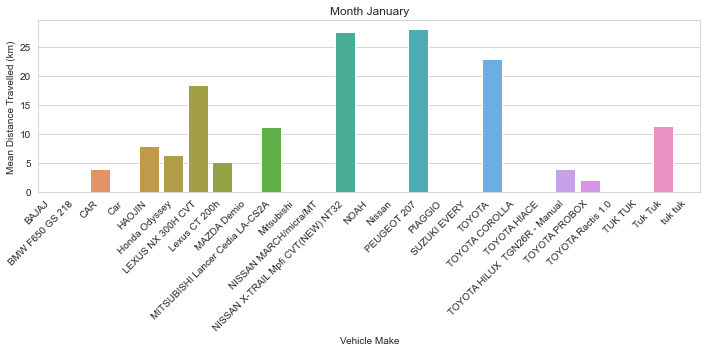

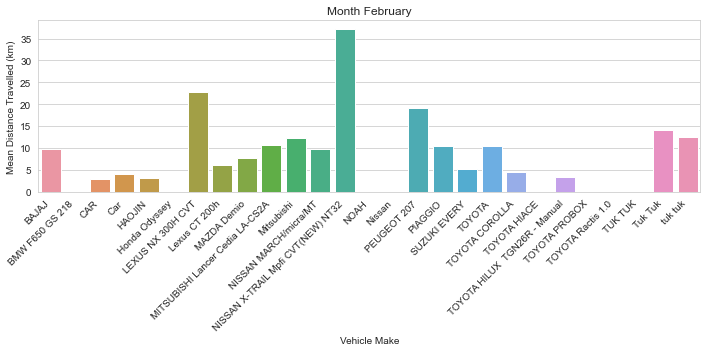

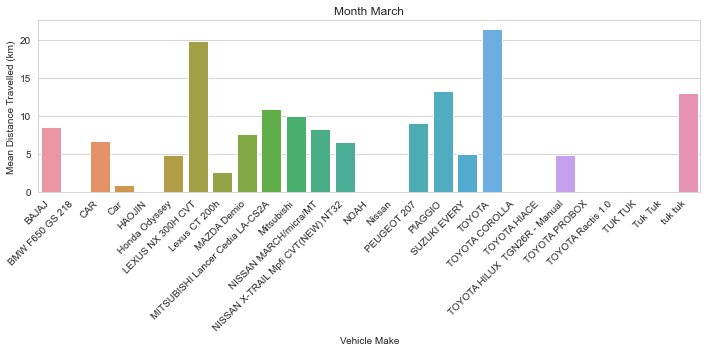

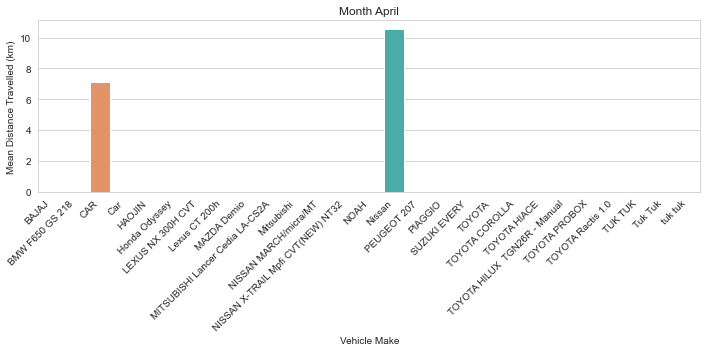

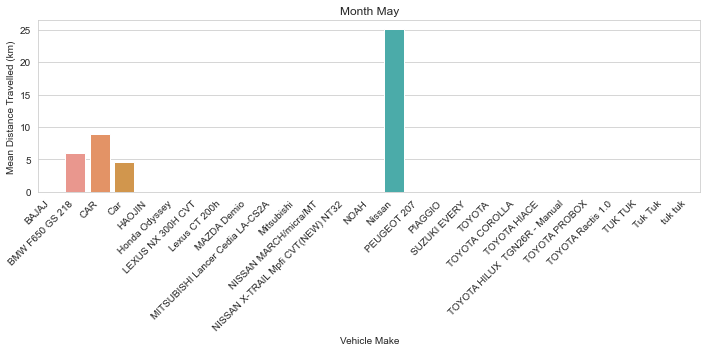

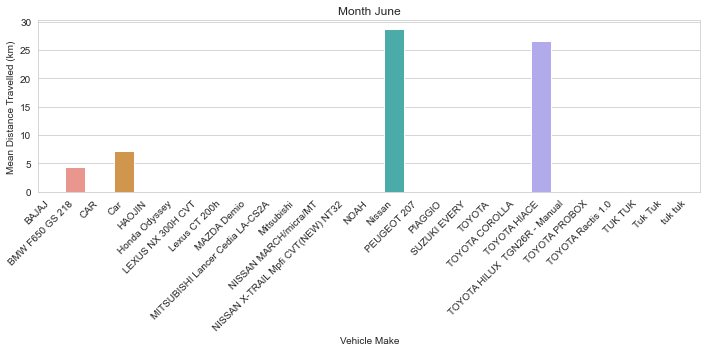

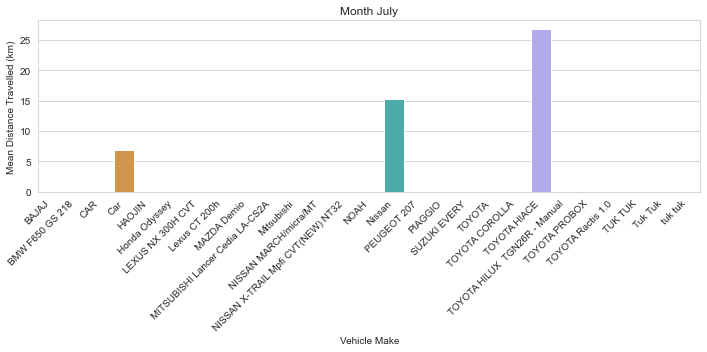

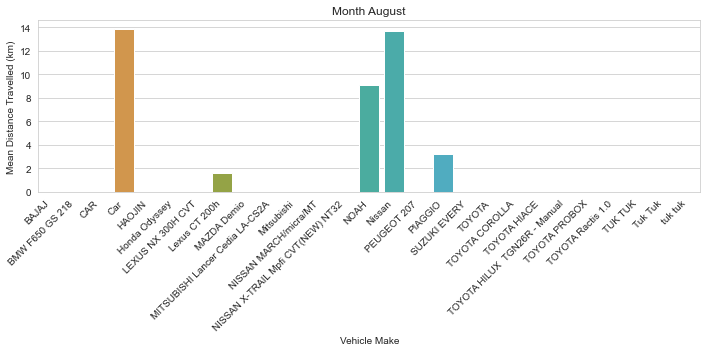

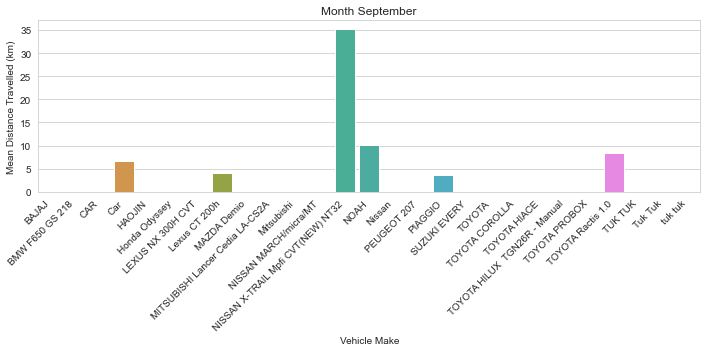

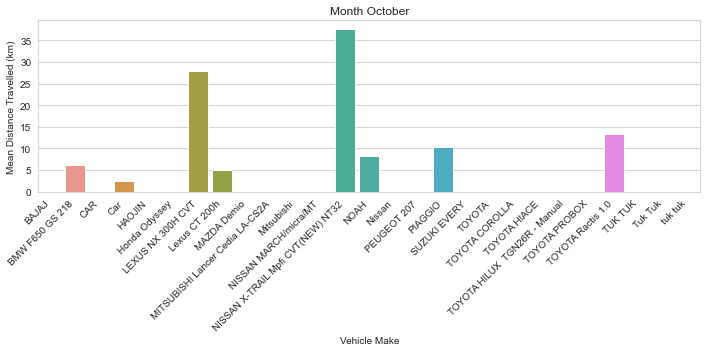

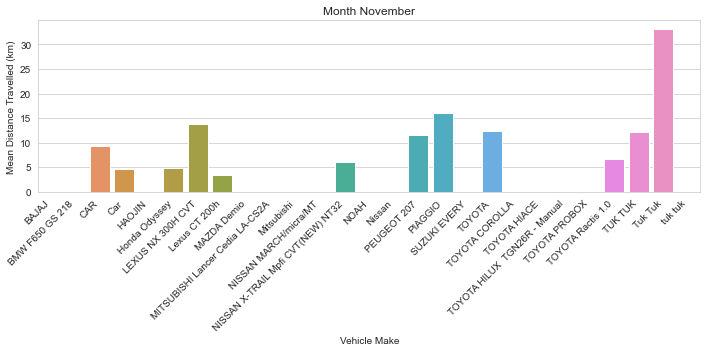

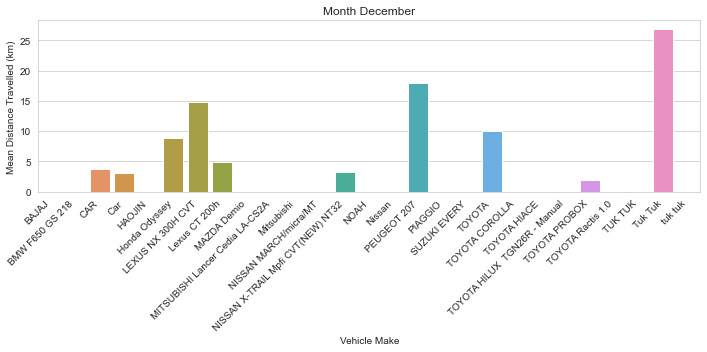

In [ ]:
import seaborn as sns

# group data by day and vehicle make
daily_distance = merged_df.groupby(['created_month', 'make'])['distance_km'].mean().reset_index()

# filter data for most frequent vehicle makes
make_counts = merged_df['make'].value_counts()
top_makes = make_counts[make_counts >= 100].index
daily_distance = daily_distance[daily_distance['make'].isin(top_makes)]

# set the style of the plot
sns.set_style('whitegrid')

# loop over each month and generate a bar plot
for month in daily_distance['created_month'].unique():
    df = daily_distance[daily_distance['created_month'] == month]
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x='make', y='distance_km')
    plt.title(f'Month {month}')
    plt.xlabel('Vehicle Make')
    plt.ylabel('Mean Distance Travelled (km)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

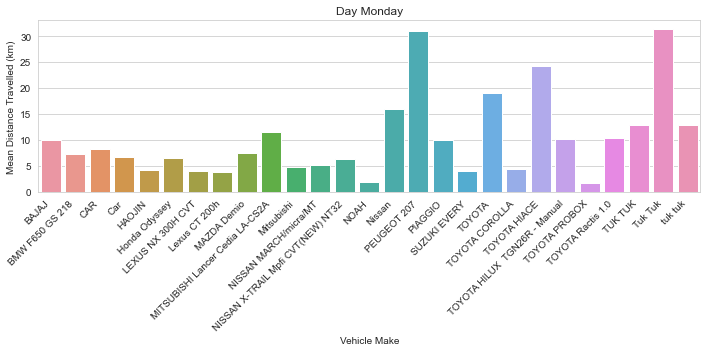

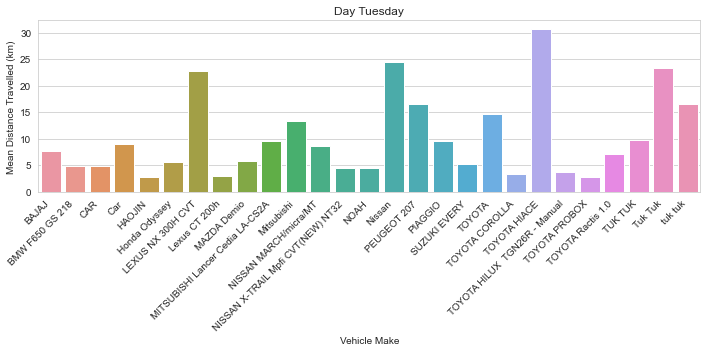

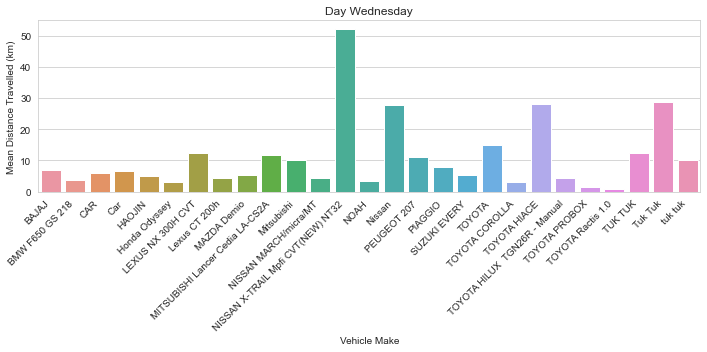

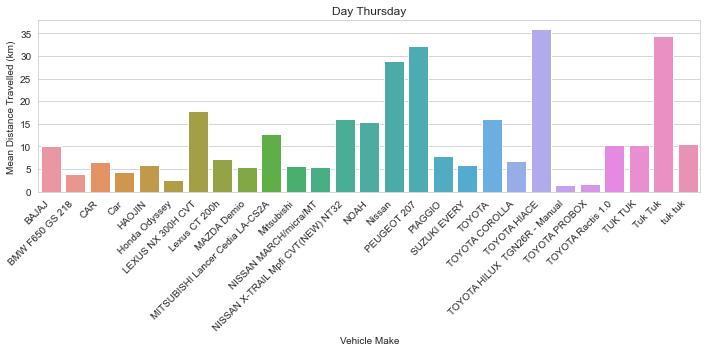

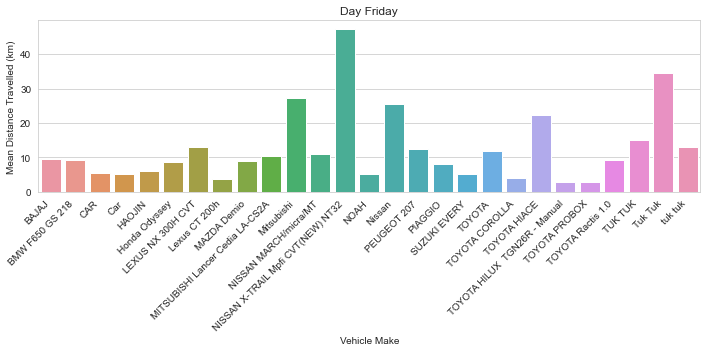

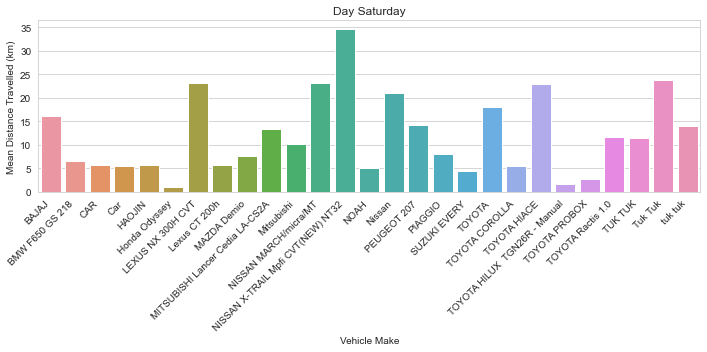

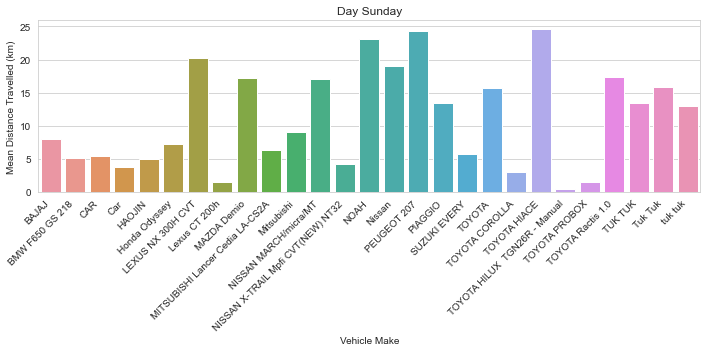

In [ ]:
# group data by day and vehicle make
daily_distance2 = merged_df.groupby(['created_day', 'make'])['distance_km'].mean().reset_index()

# filter data for most frequent vehicle makes
make_counts2 = merged_df['make'].value_counts()
top_makes2 = make_counts2[make_counts2 >= 100].index
daily_distance2 = daily_distance2[daily_distance2['make'].isin(top_makes2)]

# set the style of the plot
sns.set_style('whitegrid')

# loop over each month and generate a bar plot
for day in daily_distance2['created_day'].unique():
    df = daily_distance2[daily_distance2['created_day'] == day]
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x='make', y='distance_km')
    plt.title(f'Day {day}')
    plt.xlabel('Vehicle Make')
    plt.ylabel('Mean Distance Travelled (km)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()